In [1]:
# get the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# get the dataset
dataset = pd.read_csv('Position_Salaries.csv')
# our dataset in this implementation is small, and thus we can print it all instead of viewing only the end
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
# split the data into featutes and target variable seperately
X_l = dataset.iloc[:, 1:-1].values # features set
y_p = dataset.iloc[:, -1].values # set of study variable

In [4]:
print(X_l)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y_p)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y_p = y_p.reshape(-1,1)

In [7]:
print(y_p)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [8]:
from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(X_l)
y_p = StdS_y.fit_transform(y_p)

In [9]:
print("Scaled X_l:")
print(X_l)
print("Scaled y_p:")
print(y_p)

Scaled X_l:
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
Scaled y_p:
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


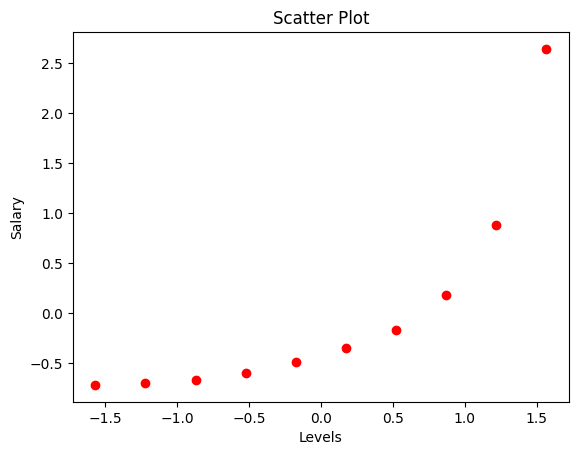

In [10]:
plt.scatter(X_l, y_p, color = 'red') # plotting the training set
plt.title('Scatter Plot') # adding a tittle to our plot
plt.xlabel('Levels') # adds a label to the x-axis
plt.ylabel('Salary') # adds a label to the y-axis
plt.show() # prints

In [11]:
# import the model
from sklearn.svm import SVR
# create the model object
regressor = SVR(kernel = 'rbf')
# fit the model on the data
regressor.fit(X_l, y_p)

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [12]:
A=regressor.predict(StdS_X.transform([[1.2]]))
print(A)

[-0.62965521]


In [13]:
# Convert A to 2D
A = A.reshape(-1,1)
print(A)

[[-0.62965521]]


In [14]:
# Taking the inverse of the scaled value
A_pred = StdS_y.inverse_transform(A)
print(A_pred)

[[70670.99294089]]


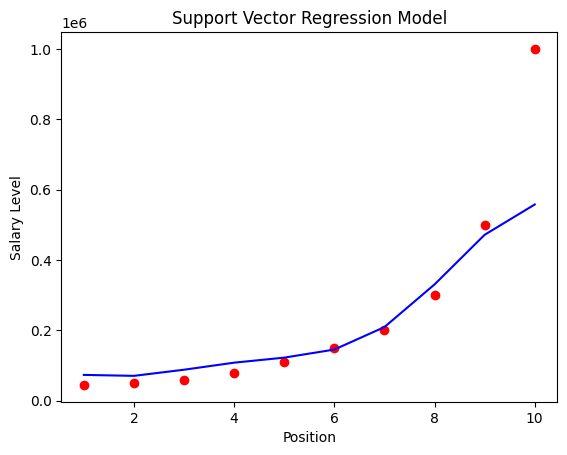

In [15]:
# inverse the transformation to go back to the initial scale
plt.scatter(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(y_p), color = 'red')
plt.plot(StdS_X.inverse_transform(X_l), StdS_y.inverse_transform(regressor.predict(X_l).reshape(-1,1)), color = 'blue')
# add the title to the plot
plt.title('Support Vector Regression Model')
# label x axis
plt.xlabel('Position')
# label y axis
plt.ylabel('Salary Level')
# print the plot
plt.show()